
<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Clothing category prediction
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;"> <p>This project involves developing a deep learning model using Convolutional Neural Networks (CNN) to classify clothing categories based on image data. Using a dataset of labeled clothing images, we aim to train a model that can accurately predict the category  for any given image.</p> <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Project Objectives:</h2> <p>The primary objective of this analysis is to build an image classification model that achieves high accuracy in predicting clothing categories. The dataset includes thousands of labeled clothing images, each associated with specific categories. The CNN model will learn visual patterns in the images, identifying features that differentiate one category from another. An additional focus will be on optimizing model accuracy through data preprocessing, model tuning, and evaluation, ensuring reliable predictions across various clothing types.</p> </div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Packages loading
</div>

In [ ]:
!pip install numpy==1.24.3 tensorflow==2.13.0
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset
!pip install tqdm requests
!pip install opencv-python-headless


In [4]:
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Downloading and unzipping
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;"> <p>This script automates the process of downloading a fashion product image dataset from Kaggle and extracting its contents for easy access. It utilizes the Kaggle API to fetch the dataset and employs a progress bar to display the download status. Upon completion, the downloaded ZIP file is immediately unzipped, making all images available for further analysis and model training.</p> <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Script Objectives:</h2> <p>The main objective of this script is to streamline the data acquisition process for fashion image classification projects. By downloading and extracting the dataset in one go, users can efficiently prepare their data for training deep learning models. This approach eliminates manual steps, allowing for quicker setup and exploration of the dataset.</p> </div>

In [11]:
import os
import requests
from tqdm import tqdm
import zipfile

os.environ['KAGGLE_CONFIG_DIR'] = '.'  # Set the current directory as the location for kaggle.json

# Path to the kaggle.json file
KAGGLE_CONFIG_DIR = '.'  # Set the current directory as the location for kaggle.json
KAGGLE_API_URL = 'https://www.kaggle.com/api/v1/datasets/download/paramaggarwal/fashion-product-images-dataset'

# Function to download a file with progress
def download_file(url, destination):
    headers = {
        'User-Agent': 'kaggle',
        'Authorization': 'Bearer ' + open('kaggle.json').read().strip()
    }
    
    # Downloading the file
    with requests.get(url, headers=headers, stream=True) as response:
        response.raise_for_status()  # Check for errors
        total_size = int(response.headers.get('content-length', 0))
        
        # Open the file in write mode
        with open(destination, 'wb') as file:
            # Use tqdm to track progress
            with tqdm(total=total_size, unit='B', unit_scale=True) as bar:
                for data in response.iter_content(chunk_size=1024):
                    file.write(data)
                    bar.update(len(data))  # Update progress

# Path to the destination file
destination_file = 'fashion-product-images-dataset.zip'

# Download the file
download_file(KAGGLE_API_URL, destination_file)

# Unzip the ZIP file
with zipfile.ZipFile(destination_file, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract to the current directory

print("The file has been successfully downloaded and extracted.")


100%|███████████████████████████████████████████████████████████████████████████| 24.8G/24.8G [1:04:05<00:00, 6.44MB/s]


In [15]:
import os

# Check if the file has been downloaded
if os.path.exists(destination_file):
    print(f"The file {destination_file} has been successfully downloaded.")
else:
    print(f"The file {destination_file} was not downloaded.")


Plik fashion-product-images-dataset.zip został pomyślnie pobrany.



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Loading and showing images
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

  <p>This code is designed to load and preprocess a dataset of fashion images along with their associated metadata for further analysis. The preprocessing steps are essential for ensuring that the images are in a consistent format suitable for training machine learning models.</p>

  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Key Steps:</h2>
  <p>1. **Loading Metadata**: The code begins by reading the <code>styles.csv</code> file, which contains metadata about the images, including their file names. It limits the number of rows to 5000 to manage memory usage and processing time efficiently.</p>
  
  <p>2. **Constructing Image Paths**: Each image file name is constructed by appending the <code>.jpg</code> extension to the corresponding identifier from the CSV file. This allows the code to locate and load the images correctly from the specified directory.</p>
  
  <p>3. **Loading and Resizing Images**: The images are loaded from the directory using the constructed file paths. Resizing the images to a standard size of <code>(224, 224)</code> pixels is crucial for several reasons:</p>
  <ul>
    <li><strong>Consistency:</strong> Different images may have varying dimensions. Resizing ensures that all images have the same size, which is necessary for batch processing in machine learning models.</li>
    <li><strong>Performance:</strong> Smaller images reduce the computational load and memory usage during training and inference, allowing models to process data more efficiently.</li>
    <li><strong>Standardization:</strong> Many pre-trained models expect inputs of specific sizes. Resizing helps align the dataset with these expectations, facilitating transfer learning if needed.</li>
  </ul>
  
  <p>4. **Normalization**: After resizing, the pixel values of the images are normalized to a range of <code>[0, 1]</code> by dividing by 255. This is a common practice in image processing to ensure that the model trains effectively and converges faster.</p>
  
  <p>5. **Shape Verification and Visualization**: Finally, the shapes of the image and label arrays are printed to confirm that they have been loaded correctly. A sample of the preprocessed images is displayed to visually verify that the loading and resizing processes were successful.</p>

</div>


Wczytywanie obrazów: 100%|█████████████████████████████████████████████████████████| 5000/5000 [04:43<00:00, 17.62it/s]


Kształt macierzy obrazów: (5000, 224, 224, 3)
Kształt etykiet: (5000,)


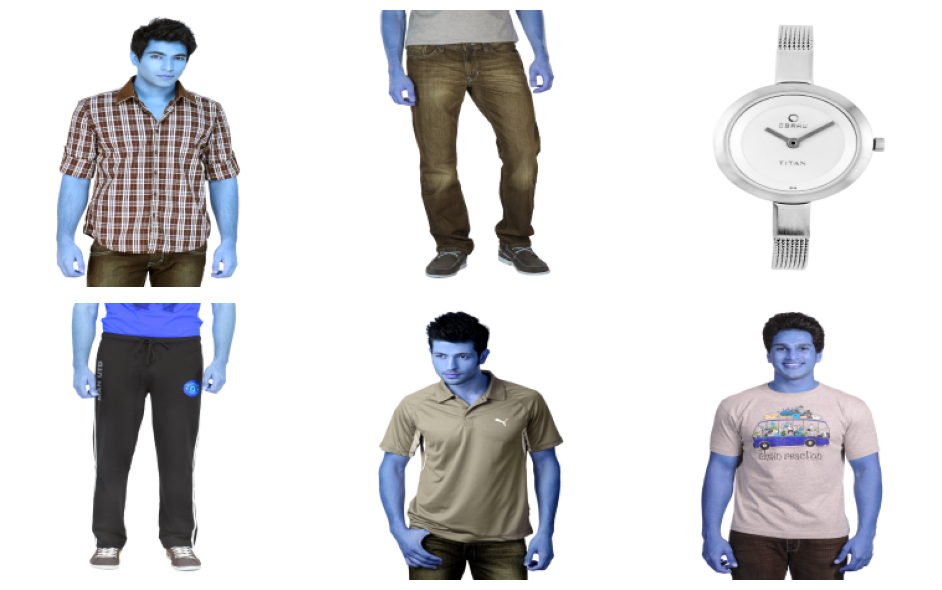

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Path to the dataset folder and images
DATASET_PATH = 'fashion-dataset/fashion-dataset/fashion-dataset/'
IMAGE_FOLDER = os.path.join(DATASET_PATH, "images1")

# Load the 'styles.csv' file with metadata (first 5000 rows)
df = pd.read_csv(os.path.join(DATASET_PATH, "styles.csv"), nrows=5000, on_bad_lines='skip')

# Add an 'image' column with .jpg file names
df['image'] = df['id'].apply(lambda x: str(x) + ".jpg")

# Function to load and preprocess images
def load_and_preprocess_images(df, target_size=(224, 224)):
    images = []
    labels = []  # Assuming you want to store labels
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Loading images"):
        image_name = row['image']  # Use the index instead of the attribute
        image_path = os.path.join(IMAGE_FOLDER, image_name)

        # Load the image
        img = cv2.imread(image_path)
        if img is not None:
            # Resize the image
            img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
            # Normalize pixel values to the range [0, 1]
            img_normalized = img_resized / 255.0
            images.append(img_normalized)
            labels.append(row['label'])  # Add ID as the label
        else:
            print(f"Error loading image: {image_path}")
    
    return np.array(images), np.array(labels)


# Load and preprocess images
images, labels = load_and_preprocess_images(df)

# Check the shape of the image matrix
print(f"Shape of image matrix: {images.shape}")
print(f"Shape of labels: {labels.shape}")

# Optional: Display some loaded images
def plot_sample_images(images, nrows=2, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 6))
    for i in range(nrows * ncols):
        if i < len(images):
            axes[i // ncols, i % ncols].imshow(images[i])
            axes[i // ncols, i % ncols].axis('off')
        else:
            axes[i // ncols, i % ncols].axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
plot_sample_images(images)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Unique categories counting
</div>

In [5]:
# Preview the number of occurrences for each category in 'subCategory'
print("Number of unique categories in 'subCategory':", df['subCategory'].nunique())
print("Number of occurrences in each category:")
print(df['subCategory'].value_counts())


Liczba unikalnych kategorii w 'subCategory': 36
Liczba wystąpień w każdej kategorii:
Topwear                     1610
Shoes                        849
Bags                         381
Watches                      322
Bottomwear                   306
Innerwear                    226
Jewellery                    145
Fragrance                    128
Sandal                       113
Flip Flops                   108
Wallets                      108
Belts                        100
Eyewear                       98
Lips                          83
Socks                         68
Loungewear and Nightwear      52
Dress                         52
Headwear                      41
Saree                         34
Ties                          26
Makeup                        23
Nails                         22
Apparel Set                   17
Accessories                   15
Free Gifts                    14
Skin                          14
Scarves                       13
Skin Care               


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Limiting categories
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <p>This code snippet is designed to filter the fashion product categories in the dataset, retaining only those with a minimum of 50 examples. This filtering process is crucial for ensuring that the dataset is balanced and that there is enough data to train a model effectively.</p>
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Filtering Objectives:</h2>
  <p>The primary objective of limiting categories is to enhance model performance and prevent overfitting. Categories with too few samples may result in unreliable predictions, so filtering helps maintain a robust dataset for training and analysis.</p>
</div>


In [68]:
# Filter categories with fewer than 50 examples
filtered_df = df[df['subCategory'].map(df['subCategory'].value_counts()) >= 50]

# Information about the remaining categories
print("Remaining categories and their counts:")
print(filtered_df['subCategory'].value_counts())

# Update the DataFrame based on the filtered categories
df = filtered_df.reset_index(drop=True)
df.shape


Remaining categories and their counts:
Topwear                     1610
Shoes                        849
Bags                         381
Watches                      322
Bottomwear                   306
Innerwear                    226
Jewellery                    145
Fragrance                    128
Sandal                       113
Flip Flops                   108
Wallets                      108
Belts                        100
Eyewear                       98
Lips                          83
Socks                         68
Dress                         52
Loungewear and Nightwear      52
Name: subCategory, dtype: int64


(4749, 13)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Trainn test split
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;"> <p>This code snippet is responsible for splitting the dataset into training and test sets using the `train_test_split` function from the `sklearn` library. By designating 20% of the data for testing, it ensures that the model can be evaluated on unseen data, which is crucial for assessing its generalization ability.</p> <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Code Objectives:</h2> <p>The primary goal of this code is to create separate subsets for training and testing the machine learning model. The training set is used to train the model, while the test set evaluates its performance. This division helps in understanding how well the model can predict new, unseen data, ultimately leading to more reliable predictions in real-world scenarios.</p> </div>

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Kształt zbioru treningowego: (4000, 224, 224, 3), Etykiety treningowe: (4000,)
Kształt zbioru testowego: (1000, 224, 224, 3), Etykiety testowe: (1000,)



<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# One hot encoding
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;"> <p>This code snippet converts the categorical labels into one-hot encoded format using the `to_categorical` function from TensorFlow's Keras utility. One-hot encoding transforms integer labels into binary matrices, making them suitable for training neural networks, as they require input in a specific numerical format.</p> <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Code Objectives:</h2> <p>The primary objective of this code is to prepare the labels for the training and testing datasets for a multi-class classification task. By converting the labels into one-hot encoded vectors, the model can more effectively learn to distinguish between different categories. This format also improves the performance of the loss function used during model training, enhancing the model's ability to make accurate predictions.</p> </div>

In [11]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(f"Training labels shape after conversion: {y_train.shape}")
print(f"Test labels shape after conversion: {y_test.shape}")


Kształt etykiet treningowych po konwersji: (4000, 36)
Kształt etykiet testowych po konwersji: (1000, 36)


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# CNN model
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  <p>This code defines a Convolutional Neural Network (CNN) model using TensorFlow and Keras. The model is structured as a sequence of layers that transform the input image into predictions for different clothing categories.</p>
  
  <h2 style="font-size: 18px; font-weight: bold; text-align: left;">Model Structure:</h2>
  <ul>
    <li><strong>Convolutional Layers:</strong> These layers (Conv2D) extract features from the input images. Each layer applies filters to capture patterns like edges and textures. The first layer has 32 filters, the second has 64, and the third has 128, increasing the complexity of features detected as the network deepens.</li>
    <li><strong>Max Pooling Layers:</strong> Following each convolutional layer, max pooling (MaxPooling2D) reduces the spatial dimensions of the data, keeping only the most important features. This helps to decrease the amount of computation and makes the model more robust to variations in the input.</li>
    <li><strong>Flatten Layer:</strong> The flatten layer transforms the 2D matrix of features into a 1D array, preparing it for the dense layers that follow.</li>
    <li><strong>Dense Layers:</strong> The dense layers (Dense) are fully connected layers that make predictions based on the features extracted by the convolutional layers. The final dense layer uses a softmax activation function to output probabilities for each clothing category.</li>
    <li><strong>Dropout Layer:</strong> This layer (Dropout) randomly sets a fraction of input units to 0 during training to prevent overfitting, helping the model generalize better to new data.</li>
  </ul>
</div>


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definition of the CNN model
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Creating an instance of the model
input_shape = (224, 224, 3)  # Image dimensions (height, width, channels)
model = create_model(input_shape, num_classes)

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  
### Model Summary Interpretation

This summary gives us an overview of the layers in our Convolutional Neural Network (CNN) and their characteristics. Here's what each part means:

- **Layer (type):** This column lists the types of layers in the model. We have convolutional layers (Conv2D), pooling layers (MaxPooling2D), a flattening layer (Flatten), and fully connected layers (Dense).

- **Output Shape:** This indicates the shape of the data after it passes through each layer. For example, after the first convolutional layer, the image size is reduced to 222x222 pixels with 32 filters.

- **Param #:** This shows the number of parameters (weights) that each layer has. More parameters typically mean the layer can learn more complex features. For instance, the first Conv2D layer has 896 parameters, while the Dense layer has over 11 million parameters, indicating it processes a lot of information.

- **Total params:** This is the total number of parameters in the entire model (about 11.2 million). These parameters are what the model learns during training to improve its predictions.

- **Trainable params:** This indicates the parameters that the model can update during training. In this case, all parameters are trainable.

- **Non-trainable params:** This shows parameters that won't be updated during training. Here, there are none, meaning all parameters will be adjusted as the model learns.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Model compiling
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">
  
### Model Compilation

This code compiles the Convolutional Neural Network (CNN) model, preparing it for training. Here’s what each component does:

- **Optimizer (`optimizer='adam'`):** The Adam optimizer is used to minimize the loss function. It combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp, to adapt the learning rate for each parameter. This helps the model converge more efficiently during training.

- **Loss Function (`loss='categorical_crossentropy'`):** This specifies the loss function used to measure the difference between the predicted and true labels. Categorical cross-entropy is suitable for multi-class classification problems, where each instance can belong to one of several classes.

- **Metrics (`metrics=['accuracy']`):** This indicates that the model's performance will be evaluated using accuracy. It calculates the percentage of correctly classified instances, allowing us to monitor the model's effectiveness during training and validation.

By compiling the model with these settings, we prepare it to learn from the training data and optimize its performance on the classification task.

</div>


In [13]:
# Model compilation
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Model training
</div>

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Model Training with Keras Progress Bar

This code trains the Convolutional Neural Network (CNN) model using the training dataset. Here’s a breakdown of the parameters used in the `fit` function:

- **`X_train` and `y_train`:** These are the training data and their corresponding labels. The model learns from this data during the training process.

- **`validation_data=(X_test, y_test)`:** This specifies the validation dataset, which is used to evaluate the model's performance after each epoch. It helps track how well the model is generalizing to unseen data.

- **`epochs=10`:** This parameter indicates the number of times the entire training dataset will pass through the model. Each pass is called an epoch. More epochs can lead to better learning but may also increase the risk of overfitting.

- **`batch_size=32`:** This defines the number of samples that will be processed before the model's internal parameters are updated. A smaller batch size can provide a more accurate estimate of the gradient, but larger batch sizes can lead to faster training.

- **`verbose=1`:** This setting enables the built-in Keras progress bar, which provides updates on the training process, including the loss and accuracy after each epoch.

The model's training history, including loss and accuracy metrics, will be stored in the `history` variable, allowing for further analysis of the model's performance over time.

</div>


In [16]:
# Model training
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=10, 
    batch_size=32,
    verbose=1  
)



Epoch 1/10
125/125 [==============================] - 141s 1s/step - loss: 1.5882 - accuracy: 0.6162 - val_loss: 0.8492 - val_accuracy: 0.7790
Epoch 2/10
125/125 [==============================] - 125s 1s/step - loss: 0.7637 - accuracy: 0.8018 - val_loss: 0.6275 - val_accuracy: 0.8420
Epoch 3/10
125/125 [==============================] - 135s 1s/step - loss: 0.5361 - accuracy: 0.8495 - val_loss: 0.6630 - val_accuracy: 0.8480
Epoch 4/10
125/125 [==============================] - 131s 1s/step - loss: 0.4138 - accuracy: 0.8823 - val_loss: 0.5510 - val_accuracy: 0.8800
Epoch 5/10
125/125 [==============================] - 123s 987ms/step - loss: 0.3074 - accuracy: 0.9095 - val_loss: 0.5717 - val_accuracy: 0.8820
Epoch 6/10
125/125 [==============================] - 144s 1s/step - loss: 0.2525 - accuracy: 0.9250 - val_loss: 0.4839 - val_accuracy: 0.8970
Epoch 7/10
125/125 [==============================] - 133s 1s/step - loss: 0.1849 - accuracy: 0.9423 - val_loss: 0.7033 - val_accuracy: 0.8

Epoch 1/10
106/125 [========================>.....] - ETA: 19s - loss: 1.6654 - accuracy: 0.6026 co to znaczy?plis zinterpretuj mi kazda z  tych liczba jakos prosto zebym miala obeznanie w tym

<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Overall Training Summary

The model was trained for 10 epochs, showcasing a strong improvement in both training and validation metrics:

- **Training Accuracy:** Increased from 61.62% in the first epoch to 96.68% by the end of training, indicating that the model learned effectively from the training data.
  
- **Validation Accuracy:** Started at 77.90% and reached a peak of 89.40%, demonstrating that the model is generalizing well to unseen data, though there were some fluctuations.

- **Loss Metrics:** The training loss consistently decreased, while the validation loss showed a mix of improvement and slight variations, suggesting the model may benefit from further tuning to enhance generalization.

### Conclusion

Overall, the model shows promising performance for the task of clothing classification, with high accuracy achieved in both training and validation datasets. Further adjustments to the model and training parameters could improve validation accuracy and reduce fluctuations in validation loss.

</div>


In [17]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Strata testowa: {test_loss}, Dokładność testowa: {test_accuracy}")


32/32 [==============================] - 7s 221ms/step - loss: 0.6404 - accuracy: 0.8930
Strata testowa: 0.6403705477714539, Dokładność testowa: 0.8930000066757202


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px;">

### Model Evaluation Results

- **Test Loss:** 0.6404
  - This value indicates how well the model predicts labels for test data. A lower loss is better, and while 0.6404 is not perfect, it shows that the model can make reasonable predictions.

- **Test Accuracy:** 89.30%
  - A high accuracy of 89.30% means the model correctly classifies about 89 out of 100 test images. This is a strong result for image classification, especially for clothing categories.

### Assessment of Results

- **Good Performance:** The accuracy of 89.30% is impressive for many image classification tasks, suggesting that the model is effective and useful for practical applications.

- **Potential Improvements:**
  - **Larger Dataset:** More data could help the model learn better distinctions between categories.
  - **Architecture Optimization:** Testing different neural network architectures may yield better results.
  - **Regularization Techniques:** Using methods like Dropout could reduce overfitting.

### Summary

In summary, the results of 0.6404 loss and 89.30% accuracy indicate that the model effectively recognizes clothing categories from images. Further experiments could enhance accuracy, but the model already shows promising performance.

</div>


<div style="background-color: #F9F9F9; padding: 20px; border-radius: 5px; text-align: center;">

# Assigning category to our own pictures
</div>

In [19]:
def predict_image(model, image_path, target_size=(224, 224)):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    
    # Resize the image
    img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
    # Normalize the pixels to the range [0, 1]
    img_normalized = img_resized / 255.0
    # Change the shape of the image to (1, 224, 224, 3)
    img_array = np.expand_dims(img_normalized, axis=0)
    
    # Prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    
    # Return the predicted category
    return label_encoder.inverse_transform(predicted_class)[0]  # Convert the label back to the original category


In [37]:
import os
import cv2
import numpy as np

# Path to the image
my_image_path = r"C:\Users\weron\OneDrive\Pulpit\cv\obrazki\watch.jpg"

# Check if the file exists
if os.path.exists(my_image_path):
    # Function to predict the category of the image
    def predict_image(model, image_path):
        # Load the image
        img = cv2.imread(image_path)
        
        if img is None:
            print("Error: Could not load the image.")
            return None
        
        # Resize to (224, 224)
        img_resized = cv2.resize(img, (224, 224))
        
        # Normalize pixels to the range [0, 1]
        img_normalized = img_resized / 255.0
        
        # Add a batch dimension
        img_array = np.expand_dims(img_normalized, axis=0)
        
        # Prediction
        predictions = model.predict(img_array)
        
        # Get the index of the category with the highest value
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Read the category name from the labels
        predicted_category = label_encoder.inverse_transform(predicted_class_index)
        return predicted_category[0]  # Return the first predicted category

    # Predicting the category
    predicted_category = predict_image(model, my_image_path)
    
    if predicted_category:
        print(f"Predicted category for the image: {predicted_category}")
else:
    print(f"File does not exist: {my_image_path}")


1/1 [==============================] - 0s 45ms/step
Przewidywana kategoria dla obrazu: Watches


In [50]:
import os
import cv2
import numpy as np

# Path to the image
my_image_path = r"C:\Users\weron\OneDrive\Pulpit\cv\obrazki\slipy.jpg"

# Check if the file exists
if os.path.exists(my_image_path):
    # Function to predict the category of the image
    def predict_image(model, image_path):
        # Load the image
        img = cv2.imread(image_path)
        
        if img is None:
            print("Error: Could not load the image.")
            return None
        
        # Resize to (224, 224)
        img_resized = cv2.resize(img, (224, 224))
        
        # Normalize pixels to the range [0, 1]
        img_normalized = img_resized / 255.0
        
        # Add a batch dimension
        img_array = np.expand_dims(img_normalized, axis=0)
        
        # Prediction
        predictions = model.predict(img_array)
        
        # Get the index of the category with the highest value
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Read the category name from the labels
        predicted_category = label_encoder.inverse_transform(predicted_class_index)
        return predicted_category[0]  # Return the first predicted category

    # Predicting the category
    predicted_category = predict_image(model, my_image_path)
    
    if predicted_category:
        print(f"Predicted category for the image: {predicted_category}")
else:
    print(f"File does not exist: {my_image_path}")


1/1 [==============================] - 0s 39ms/step
Przewidywana kategoria dla obrazu: Bottomwear


In [53]:
import os
import cv2
import numpy as np

# Ścieżka do obrazu
my_image_path = r"C:\Users\weron\OneDrive\Pulpit\cv\obrazki\bags1.jpg"

# Sprawdzenie, czy plik istnieje
if os.path.exists(my_image_path):
    # Funkcja do przewidywania kategorii obrazu
    def predict_image(model, image_path):
        # Wczytaj obraz
        img = cv2.imread(image_path)
        
        if img is None:
            print("Błąd: nie udało się wczytać obrazu.")
            return None
        
        # Zmień rozmiar na (224, 224)
        img_resized = cv2.resize(img, (224, 224))
        
        # Normalizacja pikseli do zakresu [0, 1]
        img_normalized = img_resized / 255.0
        
        # Dodanie wymiaru wsadowego
        img_array = np.expand_dims(img_normalized, axis=0)
        
        # Przewidywanie
        predictions = model.predict(img_array)
        
        # Uzyskanie indeksu kategorii o najwyższej wartości
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Odczytanie nazwy kategorii z etykiet
        predicted_category = label_encoder.inverse_transform(predicted_class_index)
        return predicted_category[0]  # Zwróć pierwszą przewidywaną kategorię

    # Przewidywanie kategorii
    predicted_category = predict_image(model, my_image_path)
    
    if predicted_category:
        print(f"Przewidywana kategoria dla obrazu: {predicted_category}")
else:
    print(f"Plik nie istnieje: {my_image_path}")


1/1 [==============================] - 0s 53ms/step
Przewidywana kategoria dla obrazu: Bags


In [60]:
import os
import cv2
import numpy as np

# Ścieżka do obrazu
my_image_path = r"C:\Users\weron\OneDrive\Pulpit\cv\obrazki\shirt1.jpg"

# Sprawdzenie, czy plik istnieje
if os.path.exists(my_image_path):
    # Funkcja do przewidywania kategorii obrazu
    def predict_image(model, image_path):
        # Wczytaj obraz
        img = cv2.imread(image_path)
        
        if img is None:
            print("Błąd: nie udało się wczytać obrazu.")
            return None
        
        # Zmień rozmiar na (224, 224)
        img_resized = cv2.resize(img, (224, 224))
        
        # Normalizacja pikseli do zakresu [0, 1]
        img_normalized = img_resized / 255.0
        
        # Dodanie wymiaru wsadowego
        img_array = np.expand_dims(img_normalized, axis=0)
        
        # Przewidywanie
        predictions = model.predict(img_array)
        
        # Uzyskanie indeksu kategorii o najwyższej wartości
        predicted_class_index = np.argmax(predictions, axis=1)
        
        # Odczytanie nazwy kategorii z etykiet
        predicted_category = label_encoder.inverse_transform(predicted_class_index)
        return predicted_category[0]  # Zwróć pierwszą przewidywaną kategorię

    # Przewidywanie kategorii
    predicted_category = predict_image(model, my_image_path)
    
    if predicted_category:
        print(f"Przewidywana kategoria dla obrazu: {predicted_category}")
else:
    print(f"Plik nie istnieje: {my_image_path}")


1/1 [==============================] - 0s 46ms/step
Przewidywana kategoria dla obrazu: Topwear


In [ ]:
"C:\Users\weron\OneDrive\Pulpit\cv\obrazki\buty.jpg"